# PING-Assembly Network

This network is based on the Pyramidal Interneuron Network Gamma (PING) model from [1]. The proposed model extends the PING network by organizing cells into clusters of densely connected units – assemblies. In this version, assemblies are identical, and the user can set the assembly size as well as within- and between-assembly connectivity. Synaptic weights are scaled automatically so that the network generates oscillations in the low gamma range (30-40 Hz).

In [ ]:
# Install libraries
!pip install bmtk neuron --quiet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from bmtk.utils.reports.spike_trains import SpikeTrains

import json

In [ ]:
# Download the files
# !git clone ...

!rm -r PING-bmtk/
!rm -r __MACOSX/
!unzip PING-bmtk.zip

Archive:  PING-bmtk.zip
   creating: PING-bmtk/
  inflating: __MACOSX/._PING-bmtk    
  inflating: PING-bmtk/update_configs.py  
  inflating: __MACOSX/PING-bmtk/._update_configs.py  
  inflating: PING-bmtk/.DS_Store     
  inflating: __MACOSX/PING-bmtk/._.DS_Store  
  inflating: PING-bmtk/readme.md     
  inflating: __MACOSX/PING-bmtk/._readme.md  
   creating: PING-bmtk/components/
  inflating: __MACOSX/PING-bmtk/._components  
  inflating: PING-bmtk/check_output.py  
  inflating: __MACOSX/PING-bmtk/._check_output.py  
  inflating: PING-bmtk/parameters.py  
  inflating: __MACOSX/PING-bmtk/._parameters.py  
  inflating: PING-bmtk/batch.sh      
  inflating: __MACOSX/PING-bmtk/._batch.sh  
  inflating: PING-bmtk/build_network.py  
  inflating: __MACOSX/PING-bmtk/._build_network.py  
   creating: PING-bmtk/components/mechanisms/
  inflating: __MACOSX/PING-bmtk/components/._mechanisms  
  inflating: PING-bmtk/components/.DS_Store  
  inflating: __MACOSX/PING-bmtk/components/._.DS_Store  


In [ ]:
# Change the working directory
%cd PING-bmtk

/content/PING-bmtk


---
> **ℹ️ NOTE**
>
> Now open `parameters.py` on the left and update the required parameters.
---

In [ ]:
!nrnivmodl components/mechanisms/ > /dev/null 2>&1

/usr/local/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/content/PING-bmtk
Mod files: "components/mechanisms/components/mechanisms//gap.mod" "components/mechanisms/components/mechanisms//k_rtm.mod" "components/mechanisms/components/mechanisms//k_wb.mod" "components/mechanisms/components/mechanisms//leak.mod" "components/mechanisms/components/mechanisms//na_rtm.mod" "components/mechanisms/components/mechanisms//na_wb.mod" "components/mechanisms/components/mechanisms//vecevent.mod"

Creating 'x86_64' directory for .o files.

 -> NMODL ../components/mechanisms//gap.mod
 -> NMODL ../components/mechanisms//k_wb.mod
 -> Compiling mod_func.cpp
 -> NMODL ../components/mechanisms//k_rtm.mod
Translating gap.mod into /content/PING-bmtk/x86_64/gap.c
Thread Safe
Translating k_rtm.mod into /content/PING-bmtk/x86_64/k_rtm.c
 -> NMODL ../components/mechanisms//leak.mod
Th

In [ ]:
# Build the network
!python build_network.py
!python update_configs.py

In [ ]:
# Run the simulation
!nrniv -python run_bionet.py config.json

/usr/local/bin/nrniv:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
--No graphics will be displayed.
NEURON -- VERSION 8.2.6+ HEAD (078a34a9d+) 2024-07-24
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2022
See http://neuron.yale.edu/neuron/credits

loading membrane mechanisms from x86_64/.libs/libnrnmech.so
Additional mechanisms from files
 "components/mechanisms//gap.mod" "components/mechanisms//k_rtm.mod" "components/mechanisms//k_wb.mod" "components/mechanisms//leak.mod" "components/mechanisms//na_rtm.mod" "components/mechanisms//na_wb.mod" "components/mechanisms//vecevent.mod"
2024-11-12 17:53:12,105 [INFO] Created log file
NEURON mechanisms not found in /content/PING-bmtk/components/mechanisms.
2024-11-12 17:53:12,182 [INFO] Building cells.
2024-11-12 17:53:12,405 [INFO] Building recurrent connections
2024-11-12 17:53:13,644 [INFO] Running simulation for 40

In [ ]:
# Check oscillation frequency
spikes = SpikeTrains.load('output/spikes.h5', population = 'PING-Assembly')
ISI = np.diff(np.sort(spikes.get_times(node_id = 0)))
print(f"The network is oscillating around {1000 / np.mean(ISI)} Hz.")

The network is oscillating around 31.27401871135708 Hz.


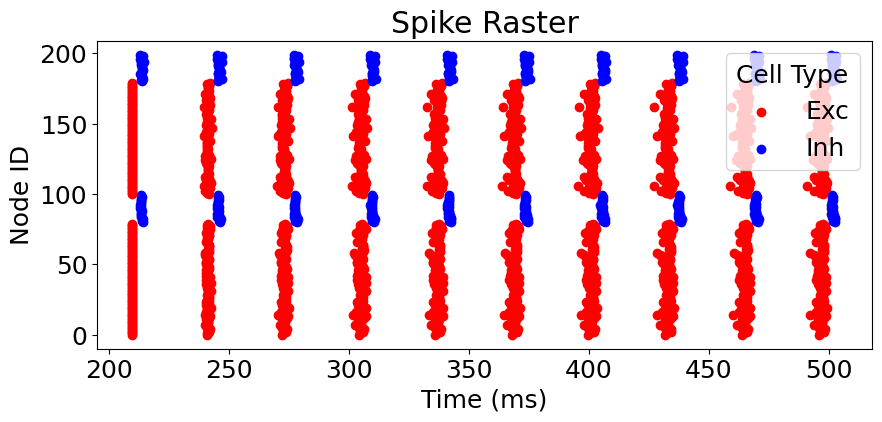

In [ ]:
plt.rcParams.update({'font.size': 18})
# Plot the spike raster
with open("gid_info.json", "r") as file:
    gids = json.load(file)

fig, ax = plt.subplots(1, 1, figsize = (10, 4))

N_SPIKES_TO_PLOT = 10
N_NODES_TO_PLOT = np.max([len(np.array(gids['all_gids']).flatten()), 100])

for node_id in range(N_NODES_TO_PLOT):
    if node_id in gids["all_exc_gids"]:
        color = "red"; label = 'exc'
    elif node_id in gids["all_inh_gids"]:
        color = "blue"; label = 'inh'

    spikes_per_node = np.sort(spikes.get_times(node_id = node_id))[:N_SPIKES_TO_PLOT]
    sc = ax.scatter(spikes_per_node, [node_id] * len(spikes_per_node), c = color, label = label)

ax.set_ylabel("Node ID")
ax.set_xlabel("Time (ms)")
ax.set_title("Spike Raster")

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(
    [handles[labels.index("exc")], handles[labels.index("inh")]],
    ["Exc", "Inh"],
    loc = "upper right",
    title = "Cell Type")

## Bibliography

[1] Börgers, C. (2017). An introduction to modeling neuronal dynamics (Vol. 66). Berlin: Springer.